# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline 

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

df_08.info()
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 14 columns):
model                   987 non-null object
displ                   987 non-null float64
cyl                     987 non-null int64
trans                   987 non-null object
drive                   987 non-null object
fuel                    987 non-null object
cert_region             987 non-null object
veh_class               987 non-null object
air_pollution_score     987 non-null float64
city_mpg                987 non-null float64
hwy_mpg                 987 non-null float64
cmb_mpg                 987 non-null float64
greenhouse_gas_score    987 non-null int64
smartway                987 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 108.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 14 columns):
model                   832 non-null object
displ                   832 non-null float64
cyl               

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [2]:
#find what are the alternative fuel sources 
df_08.groupby('fuel').count().model




fuel
CNG           1
Gasoline    984
ethanol       1
gas           1
Name: model, dtype: int64

In [3]:
#find what are the alternative fuel sources 
df_18.groupby('fuel').count().model

fuel
Diesel          19
Electricity     12
Ethanol         26
Gas             26
Gasoline       749
Name: model, dtype: int64

In [4]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [5]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

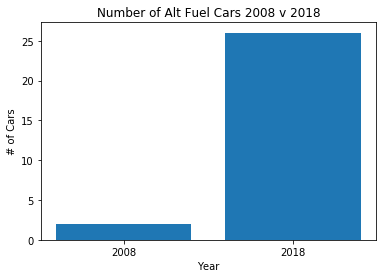

In [6]:
# Create a bar chart with 2008 and 2018 alt fuel values
locations = [1, 2]
heights = [alt_08, alt_18]
labels = ['2008', '2018']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Alt Fuel Cars 2008 v 2018')
plt.ylabel('# of Cars')
plt.xlabel('Year');

### Q2: How much have vehicle classes improved in fuel economy?  

In [27]:
#checking average combined fuel economy by vehicle class, 2018
veh_18 = df_18.groupby('veh_class').mean().cmb_mpg.round()

In [28]:
veh_08 = df_08.groupby('veh_class').mean().cmb_mpg.round()

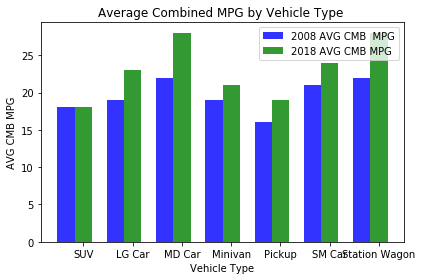

In [9]:
# plot values that are similar in a barchart 

#data to plot
n_groups = 7
means_08 = (18, 19, 22, 19, 16, 21, 22)
means_18 = (18, 23, 28, 21, 19, 24, 28)

#create plot

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_08, bar_width,
alpha=opacity,
color='b',
label='2008 AVG CMB  MPG')

rects2 = plt.bar(index + bar_width, means_18, bar_width,
alpha=opacity,
color='g',
label='2018 AVG CMB MPG')

plt.xlabel('Vehicle Type')
plt.ylabel('AVG CMB MPG')
plt.title('Average Combined MPG by Vehicle Type ')
plt.xticks(index + bar_width, ('SUV', 'LG Car', 'MD Car', 'Minivan', 'Pickup', 'SM Car', 'Station Wagon'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

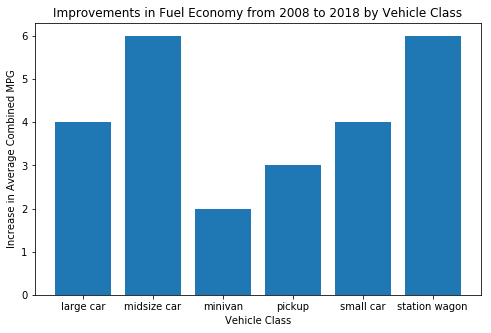

In [30]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [10]:
#see what unique values are in the smartway column 
df_18['smartway'].unique()


array(['No', 'Yes', 'Elite'], dtype=object)

In [11]:
#filter datasets for rows that are/are not smartway cars
smartway_no = df_18.query('smartway == "No"')
smartway_yes = df_18.query('smartway in ["Yes", "Elite"]')

In [12]:
#confirm changes have been made 
smartway_yes['smartway'].unique()

array(['Yes', 'Elite'], dtype=object)

In [13]:
#confirm changes have been made 
smartway_no['smartway'].unique()

array(['No'], dtype=object)

In [14]:
mean_smartway_no = smartway_no.mean().round()
mean_smartway_yes = smartway_yes.mean().round()

In [15]:
mean_smartway_no

displ                    3.0
cyl                      6.0
air_pollution_score      4.0
city_mpg                19.0
hwy_mpg                 27.0
cmb_mpg                 22.0
greenhouse_gas_score     4.0
dtype: float64

In [16]:
mean_smartway_yes

displ                    2.0
cyl                      4.0
air_pollution_score      5.0
city_mpg                35.0
hwy_mpg                 41.0
cmb_mpg                 37.0
greenhouse_gas_score     8.0
dtype: float64

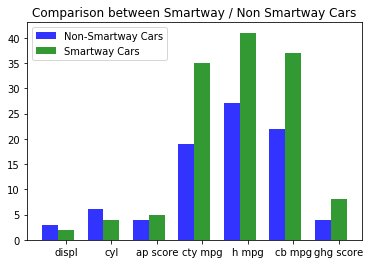

In [17]:
# plot values that are similar in a barchart 

#data to plot
n_groups = 7
Smartway_No = (3,6,4,19,27,22,4)
Smartway_Yes_Elite = (2,4,5,35,41,37,8)

#create plot

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Smartway_No, bar_width,
alpha=opacity,
color='b',
label='Non-Smartway Cars')

rects2 = plt.bar(index + bar_width, Smartway_Yes_Elite, bar_width,
alpha=opacity,
color='g',
label='Smartway Cars')


plt.title('Comparison between Smartway / Non Smartway Cars')
plt.xticks(index + bar_width, ('displ', 'cyl', 'ap score', 'cty mpg', 'h mpg', 'cb mpg', 'ghg score'))
plt.legend()

plt.show()

### Q4: What features are associated with better fuel economy?

In [18]:
#Define was is good mpg by finding the quartiles 
median = df_18['cmb_mpg'].median()
median

23.0

In [19]:
# Use query to select high combined mpg cars 
high_mpg_cars = df_18.query('cmb_mpg >= {}'.format(median))

high_mpg_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 831
Data columns (total 14 columns):
model                   451 non-null object
displ                   451 non-null float64
cyl                     451 non-null int64
trans                   451 non-null object
drive                   451 non-null object
fuel                    451 non-null object
cert_region             451 non-null object
veh_class               451 non-null object
air_pollution_score     451 non-null float64
city_mpg                451 non-null float64
hwy_mpg                 451 non-null float64
cmb_mpg                 451 non-null float64
greenhouse_gas_score    451 non-null int64
smartway                451 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 52.9+ KB


In [20]:
#Lets take a look at the proportion of drive types for both segments
drive_high = high_mpg_cars.drive.value_counts() / 451

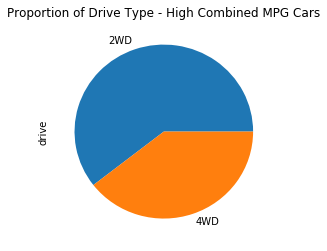

In [21]:
#Now plot the value of 4WD + 2WD cars that have high combined MPG 
#data to plot
drive_high.plot(kind='pie', figsize = (4,4), title = 'Proportion of Drive Type - High Combined MPG Cars');


It looks like cars with higher fuel economy are more likely to be 2wd cars 

lets take a look at the distribution of cyl that low v high mpg cars tend to have 

In [22]:
cyl_high = high_mpg_cars.cyl.value_counts() / 451

cyl_high

4    0.773836
6    0.184035
3    0.042129
Name: cyl, dtype: float64

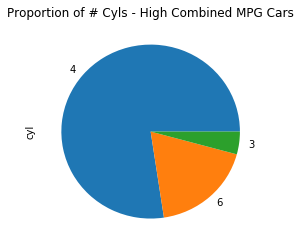

In [23]:
#lets plot the results for High MPG cars 
cyl_high.plot(kind='pie', figsize = (4,4), title = 'Proportion of # Cyls - High Combined MPG Cars');


Cars that have high MPG are more likely to have 4 Cylinders

In [24]:
#let's look at what are the vehicle classes that have high combined mpg 
veh_class_high = high_mpg_cars.veh_class.value_counts() / 451

veh_class_high

small car          0.399113
midsize car        0.248337
small SUV          0.157428
large car          0.095344
station wagon      0.070953
standard SUV       0.015521
pickup             0.008869
special purpose    0.004435
Name: veh_class, dtype: float64

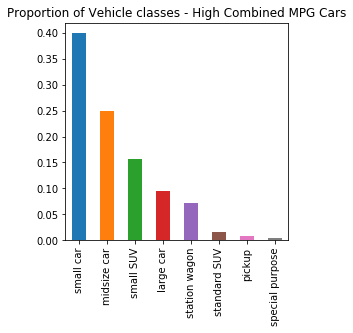

In [25]:
#Let's plot the results above 

veh_class_high.plot(kind='bar', figsize = (4,4), title = 'Proportion of Vehicle classes - High Combined MPG Cars');

Small and Midsized cars are the most likely vehicle class of better fuel economy cars 